# Data Organization for linArray_app

In [1]:
#load libraries
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
import math
import alignment_functions as af
import PyTrack.etDataReader as et

In [ ]:
#dir( af )

In [2]:
from os import listdir
from os.path import isfile, join
mypath = "/home/bonzilla/Documents/ScienceLife/linArray/linArray_data/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print( onlyfiles )

['T35_083018_t1_spikingDAT.mat', 'T35_083018_t2_spikingDAT.mat', 'T35_083018_t2-01.plx', 'T35_083018_t2.plx', 'T35_083018_t3.plx', 'T35_083018_t1.plx', 'T35_083018_t3_spikingDAT.mat', 'T35_083018_t1-01.plx']


In [ ]:
#load .mat into python environment @ new machine
chosen_data = onlyfiles[0]
linArrayPath = mypath + chosen_data
linArrayMat = loadmat( linArrayPath )
multi_dSacctrials = af.getMultiChannelTrialData( linArrayMat, 'SPK', 'delayedSaccIntervals' )
multi_dSacctrials.shape

## Delayed Saccade

In [ ]:
multi_dSacctrials = af.getMultiChannelTrialData( linArrayMat, 'SPK', 'delayedSaccIntervals', timeint = [0., 90.] )
addStrobes = multi_dSacctrials.copy()
addStrobes = af.addEventMarker( linArrayMat, addStrobes, [ 30, 40, 555, 666, 100 ], 'delayedSaccIntervals' )

In [ ]:
# aligning neural data
stimOn = 555 #define the eventmarker for stimulus onset
multi_DSalign = af.addStimOnset( addStrobes, stimOn, 'SPK' )

In [ ]:
stimOnCols = af.getDataTypeNames( multi_DSalign, 'stimOn_' ).values.tolist()
stimOnCols = [item for sublist in stimOnCols for item in sublist]
time_axis_limits_ms = [ -50, 150 ]

In [ ]:
#load behavioral .mat into python environment
path = "/home/bonzilla/Documents/ScienceLife/linArray/bhv_083018/"

bhv_file = "180830_Peanut_delayedSaccadeTask_2016_6_8(1)(1).mat"
bhvPath = path + bhv_file #"180830_Peanut_delayedSaccadeTask_2016_6_8(1)(1).mat" #holds 22 trials, 14 correct trials Track2 RF mapping == T35_083018_t2_delayedSaccade.pkl
#bhvPath = path + bhv_file #"180830_Peanut_delayedSaccadeTask_2016_6_8(1)(2).mat" #holds 52 trials, 41 correct trials Track2 RF+180
#bhvPath = path + bhv_file #"180830_Peanut_delayedSaccadeTask_2016_6_8(1)(3).mat" #holds 82 trials, 70 correct trials ???
#bhvPath = path + "180830_Peanut_delayedSaccadeTask_2016_6_8(1).mat" #holds 152 trials, 64 correct trials Track1?
bhvMat = loadmat( bhvPath )

In [ ]:
BHV_df = af.bhvmat2pandasdf( bhvMat )
BHV_plusEV = af.addMultiEventVariables( BHV_df, [ 30, 40, 666, 100 ] )
print( BHV_plusEV.shape )
# select just the correct trials
BHV_correct = BHV_plusEV[
    BHV_plusEV['Trial_Error']==0].reset_index()
print( BHV_correct.shape )

In [ ]:
#merging neural & behavioral data 
column_list = [ 'AnalogEyeData', 'bhv_code30', 'bhv_code40', 'bhv_code666' ]
mergedDS = af.mergeBehavioralColumn( 
    multi_DSalign, BHV_correct, column_list )
mergedDS = af.split_analog_eye( mergedDS, 'AnalogEyeData' )

In [ ]:
merged_bothAlign = af.add_saccade_onsets( mergedDS, 'bhv_code40', 'bhv_code666' )
stimOn_eyealign = af.alignments4trials( merged_bothAlign, 'bhv_code40', 'saccade_onset', 0 )
plt.show( stimOn_eyealign )

In [ ]:
merged_bothAlign = af.adjustSpikes_SaccadeStart( merged_bothAlign, 'saccade_onset', 'SPK' )

In [ ]:
combinedalign = af.eyespike_dualAligned( merged_bothAlign, 'SPK13i', 'bhv_code40', 'saccade_onset', time_axis_limits_ms, 0  )
plt.show( combinedalign )

In [ ]:
merged_bothAlign = merged_bothAlign.assign( neuralDat = chosen_data, BHVdat = bhv_file )
merged_bothAlign

In [ ]:
merged_bothAlign.to_pickle("T35_083018_t1_delayedSaccade.pkl")

In [ ]:
t1 = pd.read_pickle("T35_083018_t1_delayedSaccade.pkl")
t2 = pd.read_pickle("T35_083018_t2_delayedSaccade.pkl")
t3 = pd.read_pickle("T35_083018_t3_delayedSaccade.pkl")

ds_df = pd.concat([t1, t2, t3], ignore_index=True)
ds_df = ds_df.assign( task = 'delayed saccade' )
ds_df.shape

In [ ]:
#ds_df.to_pickle("delayedSaccade.pkl")

## catSearchPHYSIOL

In [11]:
#load .mat into python environment @ new machine
chosen_data = onlyfiles[1]
linArrayPath = mypath + chosen_data
linArrayMat = loadmat( linArrayPath )

# demonstrate getMultiChannelTrialData()
# generates a pandas dataframe with a row for each trial, start/end features and columns for each channeldata
catSearchtrials = af. getMultiChannelTrialData( linArrayMat, 'SPK', 'catSearchPHYSIOLIntervals' )
print( catSearchtrials.shape )
catSearchtrials.info()

(150, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   start   150 non-null    float64
 1   end     150 non-null    float64
 2   SPK09i  150 non-null    object 
 3   SPK10i  150 non-null    object 
 4   SPK11i  150 non-null    object 
 5   SPK12i  150 non-null    object 
 6   SPK13a  150 non-null    object 
 7   SPK13i  150 non-null    object 
 8   SPK14i  150 non-null    object 
 9   SPK15a  150 non-null    object 
 10  SPK15i  150 non-null    object 
 11  SPK16a  150 non-null    object 
 12  SPK16i  150 non-null    object 
dtypes: float64(2), object(11)
memory usage: 15.4+ KB


In [12]:
catSearchaddStrobes = catSearchtrials.copy()
af.addEventMarker( linArrayMat, catSearchaddStrobes, [ 1, 40, 666 ], 'catSearchPHYSIOLIntervals' )
catSearchaddStrobes.head()

,start,end,SPK09i,SPK10i,SPK11i,SPK12i,SPK13a,SPK13i,SPK14i,SPK15a,SPK15i,SPK16a,SPK16i,Strobed00001,Strobed00040,Strobed00666
0,362.9720,366.9035,"[363.019, 363.088, 363.0915, 363.0955, 363.113...","[363.222, 363.3275, 363.4275, 363.523, 363.822...","[362.973, 362.9765, 362.989, 362.995, 363.001,...","[362.972, 362.975, 362.9755, 362.979, 362.9895...","[363.8265, 363.8295, 363.833, 363.836, 363.871...","[363.8275, 363.8335, 363.837, 363.8715, 363.87...","[362.982, 363.007, 363.0095, 363.012, 363.044,...","[364.649, 364.7625, 366.682]","[362.992, 364.178, 364.2645, 364.7445, 364.775...","[362.9945, 363.0085, 363.0435, 363.046, 363.08...",[],[362.9845],[363.757],[]
1,367.4555,370.5080,"[367.4885, 367.5125, 367.555, 367.602, 367.629...","[367.6645, 367.668, 367.6775, 367.9265, 368.11...","[367.4625, 367.479, 367.4835, 367.4965, 367.50...","[367.4565, 367.458, 367.4595, 367.4605, 367.46...","[368.382, 368.385, 368.388, 368.4295, 368.4325...","[368.3825, 368.3855, 368.4235]","[367.4555, 367.457, 367.458, 367.4585, 367.460...",[],"[369.3245, 369.341, 369.3535, 369.36, 369.3915]","[367.5195, 367.571, 367.5925, 367.6455, 367.67...",[],[],[368.3155],[]
2,371.0595,374.5520,"[371.0655, 371.076, 371.1145, 371.132, 371.197...","[371.1095, 371.1145, 371.6995, 371.8065, 372.0...","[371.0775, 371.098, 371.1005, 371.111, 371.114...","[371.0615, 371.0625, 371.0645, 371.065, 371.06...","[371.607, 371.613, 371.7115, 371.745, 371.786,...","[371.947, 372.0255, 372.029, 372.0315, 372.069...","[371.0875, 371.095, 371.1135, 371.119, 371.124...",[372.2135],"[372.1065, 372.136, 372.1845, 372.2025, 372.211]","[371.0595, 371.063, 371.0725, 371.073, 371.097...",[],[],[371.9655],[]
3,375.0975,378.5905,"[375.112, 375.1405, 375.223, 375.259, 375.3295...","[376.058, 376.063, 376.0665, 376.0685, 376.080...","[375.101, 375.109, 375.1135, 375.123, 375.127,...","[375.0975, 375.103, 375.1045, 375.1075, 375.10...","[375.1215, 375.138, 375.141, 375.1445, 375.158...","[375.142, 376.0665, 376.0695, 376.1185, 376.11...","[375.109, 375.1115, 375.128, 375.1295, 375.131...","[378.055, 378.3955]","[375.1135, 375.1215, 376.1175, 376.2, 376.232,...","[375.1325, 375.137, 375.146, 375.174, 375.191,...",[],[],[376.007],[]
4,379.1320,383.3935,"[379.137, 379.2205, 379.565, 379.579, 379.7045...","[379.37, 379.5865, 380.1685, 380.175, 380.2185...","[379.1405, 379.171, 379.1785, 379.179, 379.185...","[379.135, 379.137, 379.139, 379.1405, 379.1465...","[379.1445, 379.361, 380.0725, 380.1795, 380.18...","[380.483, 380.7145, 381.01, 381.0455, 381.066,...","[379.138, 379.1455, 379.153, 379.163, 379.167,...","[379.203, 379.2245, 380.474, 381.1125, 381.244...","[379.138, 379.1465, 379.193, 379.216, 380.7555...","[379.149, 379.1745, 379.18, 379.198, 379.2045,...",[383.1775],[],[380.115],[]


In [13]:
# aligning neural data
stimOn = 40 #define the eventmarker for stimulus onset
catSearch_multi_DSalign = af.addStimOnset( catSearchaddStrobes, stimOn, 'SPK' )

In [14]:
stimOnCols = af.getDataTypeNames( catSearch_multi_DSalign, 'stimOn_' ).values.tolist()
stimOnCols = [item for sublist in stimOnCols for item in sublist]
print( stimOnCols )
time_axis_limits_ms = [ -50, 150 ]

['stimOn_SPK09i', 'stimOn_SPK10i', 'stimOn_SPK11i', 'stimOn_SPK12i', 'stimOn_SPK13a', 'stimOn_SPK13i', 'stimOn_SPK14i', 'stimOn_SPK15a', 'stimOn_SPK15i', 'stimOn_SPK16a', 'stimOn_SPK16i']


In [15]:
#load behavioral .mat into python environment
path = "/home/bonzilla/Documents/ScienceLife/linArray/bhv_083018/"
bhv_file = "180830_Peanut_CatSearch_Physiol_ML2_2018_8_30(1).mat"
#bhv_file = "180830_Peanut_CatSearch_Physiol_ML2_2018_8_30(2).mat"
bhvPath = path + bhv_file 
bhvMat = loadmat( bhvPath )

In [16]:
BHV_df = af.catSearchPHYSIOL2pandasdf( bhvMat )
BHV_plusEV = af.addMultiEventVariables( BHV_df, [ 1, 40, 666 ] )
print( BHV_plusEV.shape )
# select just the correct trials
BHV_correct = BHV_plusEV[
    BHV_plusEV['Trial_Error']==0].reset_index()
print( BHV_correct.shape )

(351, 12)
(150, 13)


In [25]:
#merging neural & behavioral data 
column_list = [ 'AnalogEyeData', 'bhv_code1', 'bhv_code40', 'bhv_code666' ]
mergedDS = af.mergeBehavioralColumn( 
    catSearch_multi_DSalign, BHV_correct, column_list )
mergedDS = af.split_analog_eye( mergedDS, 'AnalogEyeData' )

In [43]:
def eyespike_stimOnAligned( df, channel, stimon_marker, time_axis_limits_ms, trial_start, trial_stop=-1 ):
    """
    subplot X,Y analog eye-traces and smoothed spike histograms
    for a given range of trials (trial_start, trial_stop):
    plot1 = stimOn spikes align
    plot2 = stimOn eye align
    """
    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(6, 10))
    
    plt.subplot( 2,1,1 )
    stimOn_label = 'stimOn_' + channel
    af.channelGaussianSmoothed( df, stimOn_label, 10, time_axis_limits_ms )
    
    plt.subplot( 2,1,2 )
    for idx,_ in enumerate( df['AnalogEyeData'][trial_start:trial_stop] ):
        length = len( df['AnalogEyeData'][trial_start + idx] )
        x =  np.arange( 0, length ) - df[stimon_marker][trial_start + idx][0]
        plt.plot(x, df['X_eye'][trial_start + idx], label = "trial 1 X", color = 'red')
        plt.plot(x, df['Y_eye'][trial_start + idx], label = "trial 1 Y", color = 'blue')
        plt.axvline( x=0, color = 'black'  )
        plt.title( 'stimuOn eyetrace' )
    plt.xlim( time_axis_limits_ms ) 
    plt.ylabel('amplitude (DVA)')
    
    return fig

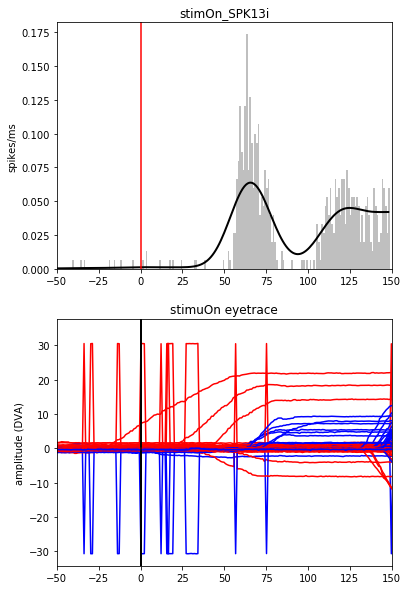

In [44]:
catSearch_stimOn_align = eyespike_stimOnAligned( mergedDS, 'SPK13i', 'bhv_code40', time_axis_limits_ms, 0  )
plt.show( catSearch_stimOn_align )